 ## Import necessary Libraries

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

## Load the Dataset

In [138]:
df = pd.read_csv('Liver Dataset.csv')

## Exploratory Data Analysis

In [139]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [140]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [141]:
df.shape

(583, 11)

In [142]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protein', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Selector'],
      dtype='object')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protein               583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Selector                    583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Data Cleaning

In [144]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protein                 0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Selector                      0
dtype: int64

In [145]:
column_name = 'Albumin_and_Globulin_Ratio'
df[column_name] = df[column_name].fillna(df[column_name].mean())

In [146]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protein                 0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Selector                      0
dtype: int64

In [147]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [148]:
df.rename(columns={'Selector': 'Diagnosis'}, inplace=True)

In [149]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protein', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Diagnosis'],
      dtype='object')

## Label Encoding

In [150]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [151]:
unique_classes = list(le.classes_)
for label, class_name in enumerate(unique_classes):
    print(f"Label {label} is assigned to class: {class_name}")

Label 0 is assigned to class: Female
Label 1 is assigned to class: Male


## Visualization

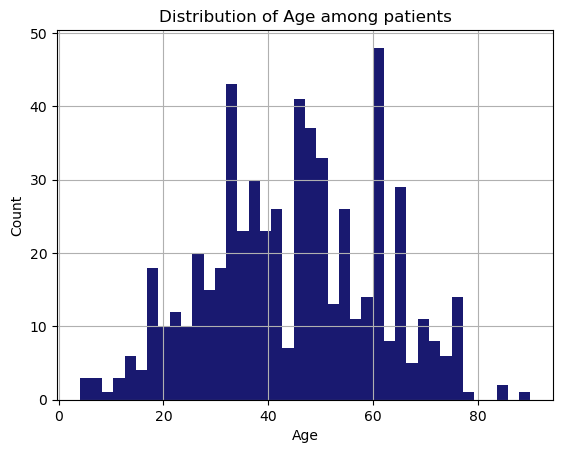

In [152]:
df['Age'].hist(bins=40, color='midnightblue')
plt.title("Distribution of Age among patients")
plt.xlabel("Age")
plt.ylabel('Count')
plt.show()

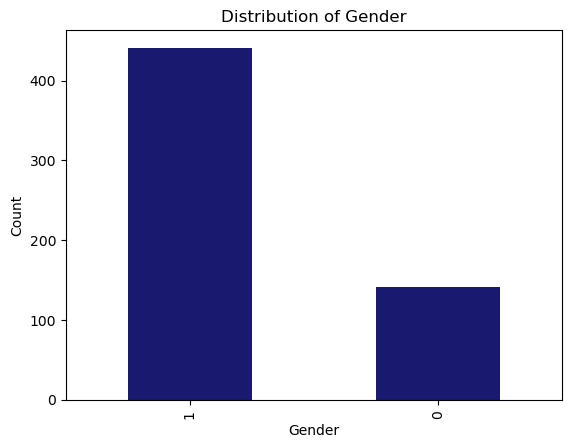

In [153]:
df['Gender'].value_counts().plot.bar(color='midnightblue')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Diagnosis of patients')

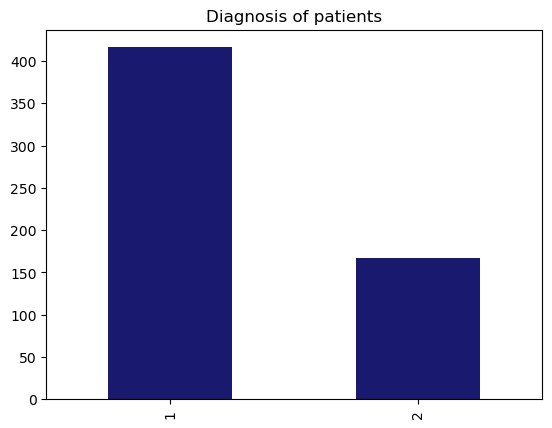

In [154]:
df['Diagnosis'].value_counts().plot.bar(color='midnightblue')
plt.title('Diagnosis of patients')

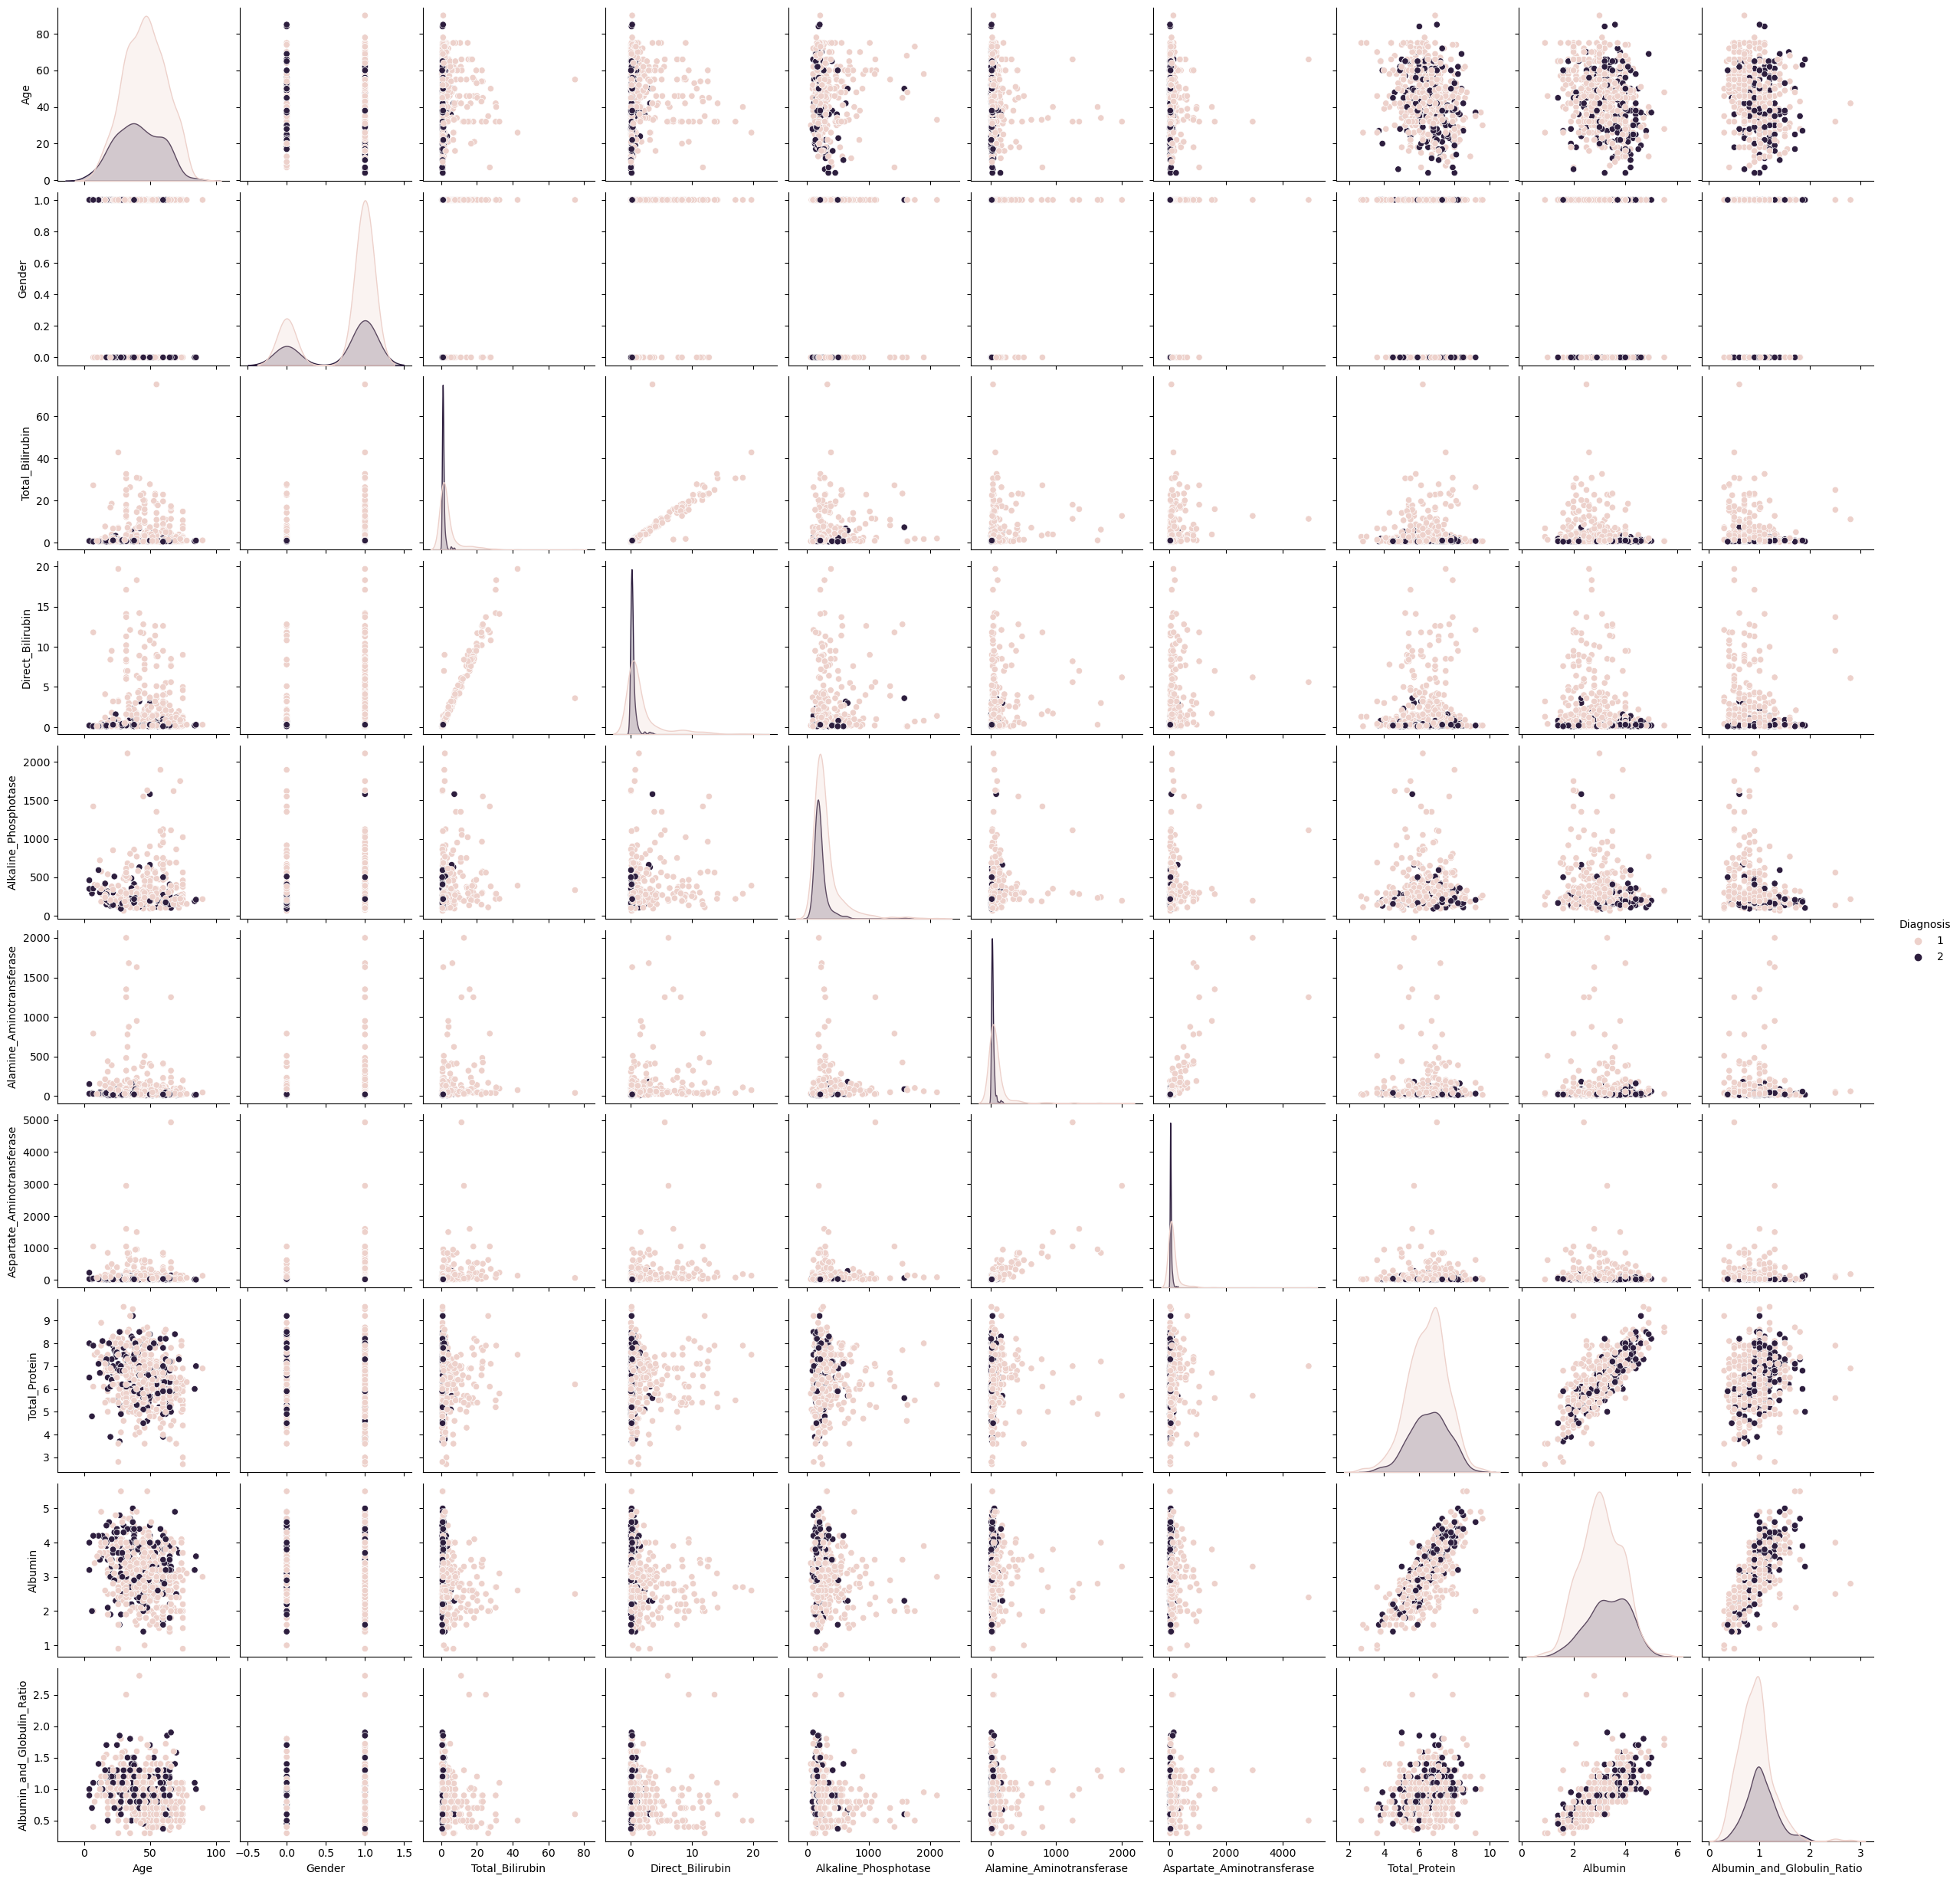

In [155]:
sns.pairplot(df,hue='Diagnosis')

In [156]:
corr = df.corr()
corr

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protein,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


<Axes: >

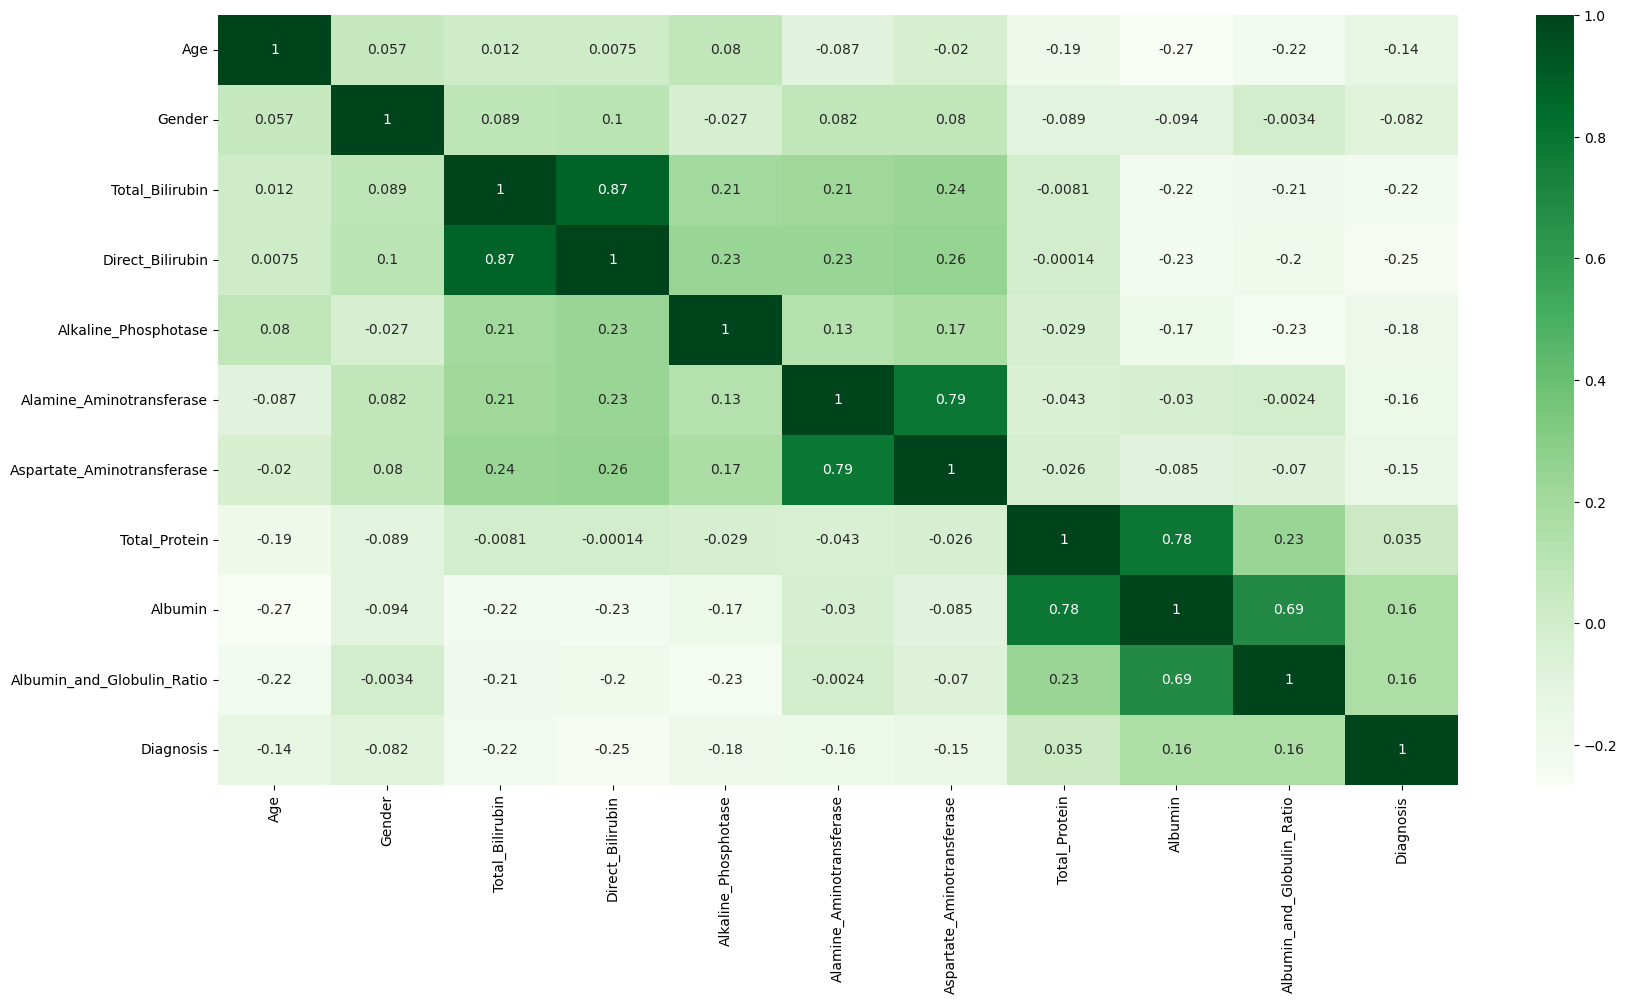

In [157]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

## Separating Input & Output Data

In [158]:
#Input Data
x=df.drop('Diagnosis',axis=1)

#Output Data
y=df['Diagnosis']

In [159]:
x.shape

(583, 10)

In [160]:
y.shape

(583,)

In [161]:
np.unique(y)

array([1, 2], dtype=int64)

In [162]:
y.value_counts()

1    416
2    167
Name: Diagnosis, dtype: int64

## Removing Outliers

In [163]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(random_state=0,contamination=0.05)
clean=iso.fit_predict(x,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [164]:
x=x[clean==1]
y=y[clean==1]  

In [165]:
x.shape

(553, 10)

In [166]:
y.shape

(553,)

In [167]:
y.value_counts()

1    386
2    167
Name: Diagnosis, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

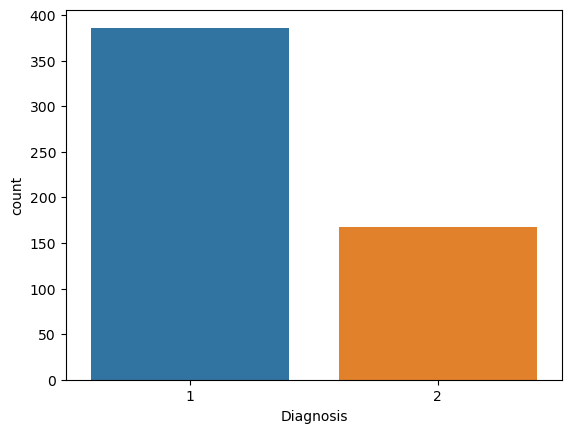

In [168]:
sns.countplot(x=y)

## Feature Selection

In [169]:
skf = SelectKBest(k=5, score_func=chi2)
skf.fit(x, y)

SelectKBest(k=5, score_func=<function chi2 at 0x0000020AF0427520>)

In [170]:
x_new = x.iloc[:,skf.get_support()]
x_new

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
0,0.7,0.1,187,16,18
1,10.9,5.5,699,64,100
2,7.3,4.1,490,60,68
3,1.0,0.4,182,14,20
4,3.9,2.0,195,27,59
...,...,...,...,...,...
578,0.5,0.1,500,20,34
579,0.6,0.1,98,35,31
580,0.8,0.2,245,48,49
581,1.3,0.5,184,29,32


In [171]:
x_new.shape

(553, 5)

In [210]:
x_new.columns

Index(['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'],
      dtype='object')

## Feature Scaling

In [172]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_new)

In [173]:
pd.DataFrame(x_scaled).describe()

,0,1,2,3,4
count,553.000000,553.000000,553.000000,553.000000,553.000000
mean,0.028725,0.080622,0.102626,0.057461,0.074812
std,0.063879,0.156451,0.100086,0.102442,0.133170
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005362,0.008000,0.054714,0.013873,0.015957
50%,0.008043,0.016000,0.069370,0.026590,0.031915
75%,0.024129,0.080000,0.110894,0.054335,0.071277
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Cross Validation

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.20, random_state=16)

In [175]:
x_train.shape

(442, 5)

In [176]:
x_test.shape

(111, 5)

In [177]:
y_train.shape

(442,)

In [178]:
y_test.shape

(111,)

## Build the Model

### Logistic Regression

In [179]:
regressor = LogisticRegression(random_state=16)
regressor.fit(x_train, y_train)

LogisticRegression(random_state=16)

In [180]:
y_pred = regressor.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

#### Performance Evaluation

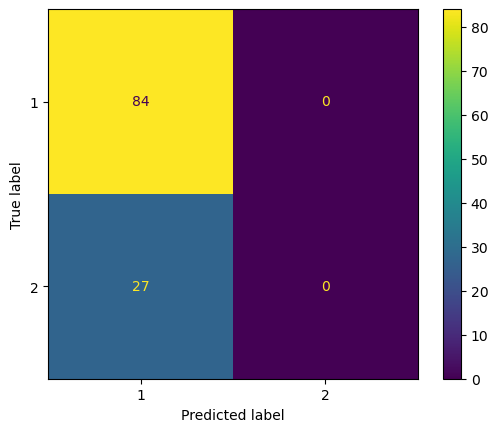

In [181]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      1.00      0.86        84
           2       0.00      0.00      0.00        27

    accuracy                           0.76       111
   macro avg       0.38      0.50      0.43       111
weighted avg       0.57      0.76      0.65       111



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
accuracy_score(y_test, y_pred)

0.7567567567567568

### Decision Tree

In [184]:
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [185]:
y_pred = dt_classifier.predict(x_test)
y_pred

array([1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1], dtype=int64)

#### Performance Evaluation

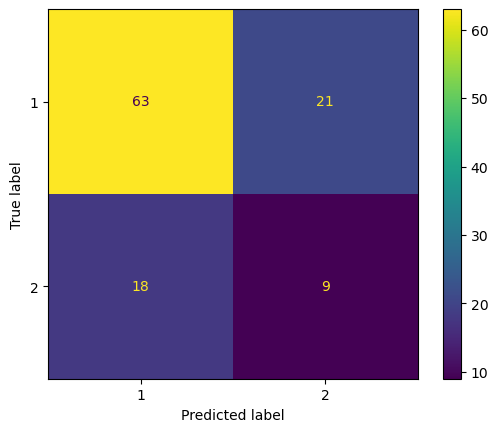

In [186]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.75      0.76        84
           2       0.30      0.33      0.32        27

    accuracy                           0.65       111
   macro avg       0.54      0.54      0.54       111
weighted avg       0.66      0.65      0.65       111



In [188]:
accuracy_score(y_test, y_pred)

0.6486486486486487

### Random Forest Classifier

In [189]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [190]:
y_pred = rf_classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1], dtype=int64)

#### Performance Evaluation

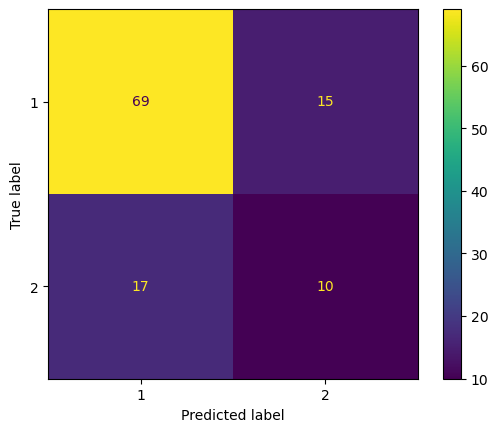

In [191]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.82      0.81        84
           2       0.40      0.37      0.38        27

    accuracy                           0.71       111
   macro avg       0.60      0.60      0.60       111
weighted avg       0.70      0.71      0.71       111



In [193]:
accuracy_score(y_test, y_pred)

0.7117117117117117

### Support Vector Machine(SVM)

In [194]:
svm_classifier = SVC(kernel='linear', C=1, random_state=0)
svm_classifier.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [195]:
y_pred = svm_classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

#### Performance Evaluation

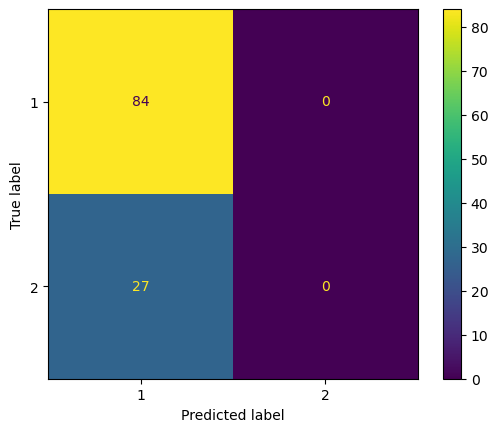

In [196]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [197]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      1.00      0.86        84
           2       0.00      0.00      0.00        27

    accuracy                           0.76       111
   macro avg       0.38      0.50      0.43       111
weighted avg       0.57      0.76      0.65       111



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
accuracy_score(y_test, y_pred)

0.7567567567567568

### K-Nearest Neighbors (KNN)

In [199]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [200]:
y_pred = knn_classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1], dtype=int64)

#### Performance Evaluation

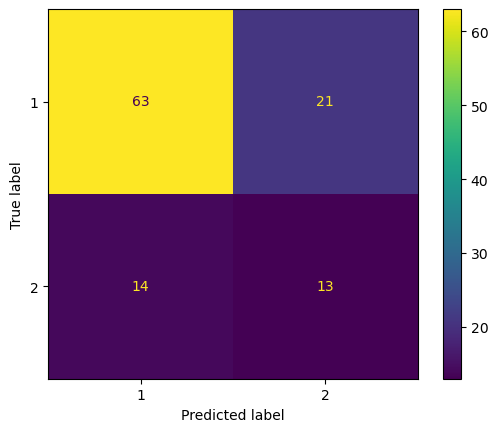

In [201]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.75      0.78        84
           2       0.38      0.48      0.43        27

    accuracy                           0.68       111
   macro avg       0.60      0.62      0.60       111
weighted avg       0.71      0.68      0.70       111



In [203]:
accuracy_score(y_test, y_pred)

0.6846846846846847

### Naive Bayes

In [204]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [205]:
y_pred = nb_classifier.predict(x_test)
y_pred

array([2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2], dtype=int64)

#### Performance Evaluation

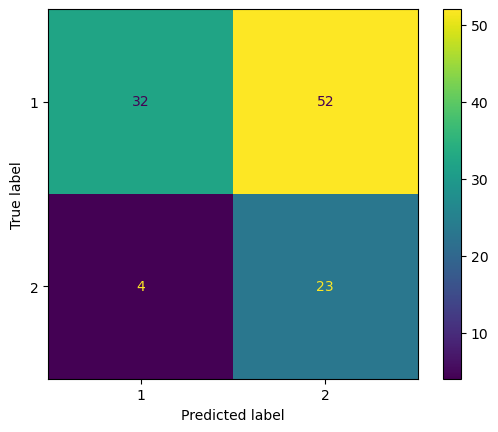

In [206]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.38      0.53        84
           2       0.31      0.85      0.45        27

    accuracy                           0.50       111
   macro avg       0.60      0.62      0.49       111
weighted avg       0.75      0.50      0.51       111



In [208]:
accuracy_score(y_test, y_pred)

0.4954954954954955

### Inference

In [211]:
pred=pd.DataFrame({
    'Total_Bilirubin':[0.8,7.4,3.8,10.9],
    'Direct_Bilirubin':[0.2,4.2,1.9,5.5],
    'Alkaline_Phosphotase':[188,492,194,699],
    'Alamine_Aminotransferase':[17,61,26,64],
    'Aspartate_Aminotransferase':[19,69,58,100]
})

In [212]:
pred

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
0,0.8,0.2,188,17,19
1,7.4,4.2,492,61,69
2,3.8,1.9,194,26,58
3,10.9,5.5,699,64,100


In [213]:
pred = scaler.transform(pred)

In [214]:
regressor.predict(pred)

array([1, 1, 1, 1], dtype=int64)

In [215]:
regressor.predict_proba(pred)

array([[0.59980709, 0.40019291],
       [0.83708597, 0.16291403],
       [0.70311897, 0.29688103],
       [0.89464555, 0.10535445]])